In [1]:
    import fiona
    import os,os.path
    from shapely.geometry import shape,mapping
    from shapely.ops import transform
    from functools import partial
    import pyproj
    from fiona.crs import from_epsg
    import osmnx as ox
    import matplotlib.pyplot as plt
    import geopandas as gpd
    import glob
    import json
    import numpy as np
    import requests as rq
    import collections
    import logging
    import time
    from PIL import Image
    from io import BytesIO
    import pandas as pd
    import dateutil.parser
    from tqdm import tqdm
    %matplotlib inline

In [37]:
city = '../Data/GreaterLondon/pointsJson/'
root = '../Data/GreaterLondon/'
files= glob.glob(city + '*.json')

In [39]:
Final_images = json.load(open('../Data/GreaterLondon/pointsJson/All_London_images_mapillary.json'))

In [40]:
def FilterByTime(imageDict , ThreshYear, ThreshMonth ):
    filtered = {}
    for k in imageDict:
        yourdate = dateutil.parser.parse(imageDict[k]['properties']['captured_at'])
        if yourdate.year > ThreshYear and yourdate.month > ThreshMonth:
            filtered[k] = imageDict[k]
    return filtered

def getYearDict(imageDict):
    yearFreq = {}
    for k in imageDict:
        yourdate = dateutil.parser.parse(imageDict[k]['properties']['captured_at'])
        if yourdate.year in yearFreq:
            yearFreq[yourdate.year]+=1
        else:
            yearFreq[yourdate.year]=1
    return yearFreq

In [41]:
len(Final_images.keys())

405768

In [42]:
yearFreq = getYearDict(Final_images)

In [43]:
yearFreq

{2016: 70853,
 2018: 79791,
 2014: 21107,
 2015: 99521,
 2019: 68754,
 2017: 63731,
 2009: 823,
 2010: 545,
 2013: 47,
 2011: 574,
 2006: 17,
 2004: 3,
 1970: 1,
 2000: 1}

In [44]:
years = dict(sorted(yearFreq.items()))

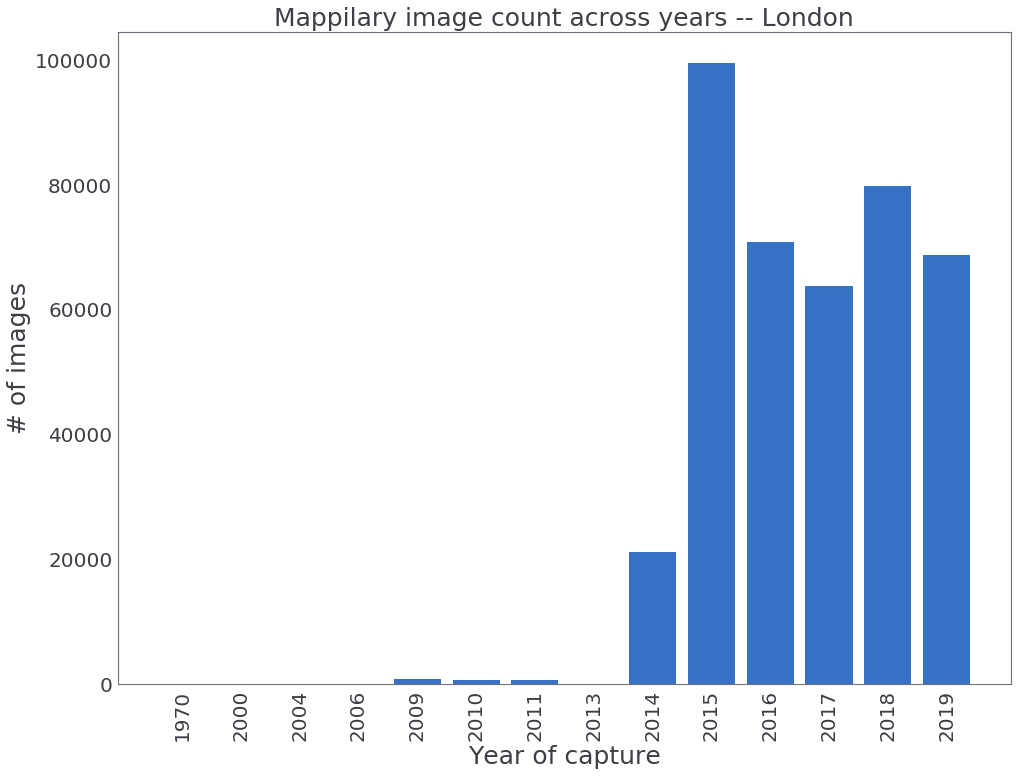

In [46]:
x = np.arange(len(yearFreq))
count = [years[y] for y in years]
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
plt.grid()
plt.bar(x, count)
plt.title('Mappilary image count across years -- London',fontsize=25)
plt.yticks(fontsize=20)
plt.ylabel('# of images',fontsize=25)
plt.xticks(x, list(years.keys()),rotation=90,fontsize=20)
plt.xlabel('Year of capture',fontsize=25)
plt.show()

In [33]:
%ls ../Data/Vienna/

Mapillary_images/  pointsJson/  shapeFiles/  Vienna_Mappilary_points.csv


In [47]:
points = pd.read_csv(root + 'London_Mappilary_points.csv')

In [48]:
points.head(n=2)

,Unnamed: 0,Imgkey,long,lat,isPano,captureTime,long_lat_string
0,0,SNkE9dXx2K0o3MaY9Zu-2A,-0.178409,51.523651,False,2016-03-24T14:44:50.927Z,-0.1784_51.5237
1,1,bneiFOYn9N2MQpjD-E7y-Q,-0.036538,51.452568,False,2018-05-03T10:59:33.785Z,-0.0365_51.4526


In [49]:
points['long_lat_string'].nunique()

203367